# Autoencoding CS:GO Rosters
Projecting large dimensional roster vectors (redundant) into lower dimensional space - 3D particularly for plotting (please see plotly graph). TOO GUN!!@@@@

*BTW this is just testing with only a handful of rosters - not difficult to apply the same analysis to all rosters*

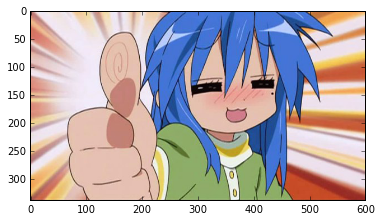

In [156]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread("anime.jpg")
plt.imshow(image)
plt.show()


In [2]:
# open in data file
dat = pd.read_csv('rosters.csv')

In [20]:
#get in a list of unique players to build index
players = []
for i in range(np.shape(dat)[1]):
    players = np.append(players, np.reshape(np.unique(dat.ix[:,i]),(len(np.unique(dat.ix[:,i])))))
    
players = np.unique(np.reshape(players,(len(players)))   )     
    

In [22]:
# lets see that dictionary of players... 
print(players)

['3k2' 'ALEX' 'DEVIL' 'Devilwalk' 'Ex6TenZ' 'FeTiSh' 'Fuks' 'Happy' 'JW'
 'KQLY' 'KRIMZ' 'Kjaerbye' 'LEGIJA' 'Lekr0' 'MICHU' 'MINISE' 'MSL'
 'Magiskb0Y' 'Maikelele' 'Maniac' 'Maziaz' 'NBK-' 'NiKo' 'Nico' 'NoTaN1dgl'
 'Pimp' 'PlesseN' 'PnX' 'RUBINO' 'RpK' 'SIXER' 'SZPERO' 'SandeN' 'ScreaM'
 'SmithZz' 'Spiidi' 'TENZKI' 'Tixo' 'Troubley' 'Xyp9x' 'YOUYOU' 'aizy'
 'allu' 'apEX' 'bodyy' 'cENTRYZ' 'cadiaN' 'cajunb' 'chrisJ' 'denis'
 'dennis' 'device' 'dupreeh' 'enka' 'flusha' 'fox' 'gla1ve' 'go' 'innocent'
 'ioRek' 'isenbo' 'jkaem' 'k0nfig' 'karrigan' 'kennyS' 'kioShiMa' 'kzy'
 'loWel' 'mouz' 'nex' 'nooky' 'olofmeister' 'oskar' 'pashaBiceps' 'pauf'
 'pronax' 'raalz' 'rain' 'rallen' 'ruggah' 'shox' 'smF' 'tabseN' 'twist'
 'wantz' 'wenton' 'znajder' 'zonic' 'zonixx']


In [27]:
# now need to encode each lineup in vector form...
rostas = np.zeros( (len(dat),len(players)) ) # big matrix

for row in range(len(dat)):
    for player in range(np.shape(dat)[1]):
        # each player (column) of each row:
        idx = np.where( players == dat.ix[row, player] )[0][0]
        rostas[row,idx] = 1
    

Ensure that the following shapes are the same - that I've done it right

In [48]:
rostas.shape

(1863, 89)

In [46]:
rosterz = np.unique(rostas.view(np.dtype((np.void, rostas.dtype.itemsize*rostas.shape[1])))).view(rostas.dtype).reshape(-1, rostas.shape[1])

In [47]:
rosterz.shape

(96, 89)

**Good!** 
* *That works*

Now we need to make the strings of roster names... not a problem to do!

In [157]:
namez = []

for i in range(len(rosterz)):
    namez.append( str(players[np.where( rosterz[i] == 1 )[0] ]) )
    
#print(namez)  # commented out bcos i wan 2  

In [56]:
### Use autoencoder now
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [109]:
''' define the model architecture '''
# this returns a tensor
inputs = Input(shape=(np.shape(rosterz)[1],))

encoding_dim = 3
# a layer instance is callable on a tensor, and returns a tensor
ENCOD = Dense(encoding_dim, activation='relu')(inputs)
DECOD = Dense(np.shape(rosterz)[1], activation='relu')(ENCOD)
#predictions = Dense(10, activation='softmax')(x)

# this creates a model that includes
# the Input layer and three Dense layers
autoencoder = Model(input=inputs, output=DECOD)

# this model maps an input to its encoded representation
encoder = Model(inputs, output = ENCOD)

# create a placeholder for an encoded (N-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
#decoder_layer = autoencoder.layers[-1]
# create the decoder model
#decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

### compile the model...
autoencoder.compile(optimizer='rmsprop', loss='mse')

In [146]:
autoencoder.fit(rosterz, rosterz,
                nb_epoch=1,
                batch_size=10,
                shuffle=True )# ,validation_split=0.3) # obviously increase the epoch's if not trained - so far about 200 has been ran

Epoch 1/1
96/96 [==============================] - 0s - loss: 0.0322     


**WOW** linux ran that iteration of data in quite literally no time at all

In [145]:
''' this is for testing how well at reconstructing inputs the net is '''
#autoencoder.predict(rosterz) - # uncomment if needed

' this is for testing how well at reconstructing inputs the net is '

In [141]:
encoded_inputs = pd.DataFrame(encoder.predict(rosterz))
encoded_inputs["name"] = namez

In [142]:
''' view the raw results '''
encoded_inputs

,0,1,2,name
0,6.218268,0.206483,5.161477,['Xyp9x' 'device' 'gla1ve' 'karrigan' 'zonic']
1,6.259408,0.364915,3.672296,['Xyp9x' 'device' 'dupreeh' 'gla1ve' 'karrigan']
2,4.224202,0.000000,3.114766,['Xyp9x' 'cajunb' 'device' 'karrigan' 'wantz']
3,4.042222,0.150993,1.356382,['Xyp9x' 'cajunb' 'device' 'dupreeh' 'karrigan']
4,5.242403,1.472112,1.059606,['Xyp9x' 'aizy' 'device' 'dupreeh' 'pashaBiceps']
5,3.778669,0.150977,1.215880,['Xyp9x' 'aizy' 'cajunb' 'device' 'dupreeh']
6,5.222292,6.761083,0.000000,['Spiidi' 'chrisJ' 'denis' 'go' 'nex']
7,2.781632,0.000000,6.129481,['RpK' 'ScreaM' 'SmithZz' 'bodyy' 'shox']
8,6.179729,7.086694,0.000000,['NiKo' 'chrisJ' 'denis' 'go' 'nex']
9,6.098625,9.668215,1.323517,['NiKo' 'Tixo' 'chrisJ' 'go' 'tabseN']


Awesome, we're done so just save the shit and GTFO my computer it's 3:40am smh tbh fam

In [143]:
# save roster vector:

encoded_inputs.to_csv('ENCODED ROSTERS.csv')

In [144]:
# save the trained model file:

from keras.models import load_model

autoencoder.save('roster_autoencoder.h5')  # creates a HDF5 file 'my_model.h5'

#del model  # deletes the existing model - uncomment when needed

# loads in a compiled model
# identical to the previous one - uncomment when needed
#autoencoder = load_model('roster_autoencoder.h5')